![logo](https://www.databolt.tech/images/logo.png)
Accelerate data science [www.databolt.tech](https://www.databolt.tech) | [github.com/d6t/d6t-python](https://github.com/d6t/d6t-python)


# DATA SCIENCE PROJECT TEMPLATES

## Regression
### ISLR advertising data

In [1]:
# processing
import d6tflow, luigi, d6tpipe
import pandas as pd
import numpy as np
import pathlib

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import cross_validate
import lightgbm
#lightgbm.LGBMRegressor
import shap
#shap.initjs()

# project
# import cfg, tasks
# import importlib # optional
# importlib.reload(cfg)
# importlib.reload(tasks)
# importlib.reload(visualize)


Loading postgres module without psycopg2 installed. Will crash at runtime if postgres functionality is used.


Welcome to d6tflow!
Welcome to d6tpipe!


## preprocessing

In [2]:
import tasks

import importlib
importlib.reload(tasks)

<module 'tasks' from 'D:\\dev\\edu-fb\\zmusic_code-nn\\tasks.py'>

In [3]:
# tasks

class TaskProcessRawData(d6tflow.tasks.TaskPqPandas):
    pass

In [4]:
d6tflow.run([tasks.TaskPreprocess()])#,forced_all=True,confirm=False, forced_all_upstream=True)

INFO: Informed scheduler that task   TaskPreprocess__99914b932b   has status   DONE
INFO: Done scheduling tasks
INFO: Running Worker with 1 processes
INFO: Worker Worker(salt=825057681, workers=1, host=DESKTOP-3CSM8J6, username=deepmind, pid=22924) was stopped. Shutting down Keep-Alive thread
INFO: 
===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 TaskPreprocess()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



True

In [5]:
# df_train_, df_users, df_words = tasks.TaskGetData().outputLoad()
df_train = tasks.TaskPreprocess().outputLoad()

In [6]:
cfg_col_X = ['HEARD_OF', 'OWN_ARTIST_MUSIC', 'LIKE_ARTIST', 'Uninspired', 'Sophisticated', 'Aggressive', 'Edgy', 'Sociable', 'Laid back', 'Wholesome', 'Uplifting', 'Intriguing', 'Legendary', 'Free', 'Thoughtful', 'Outspoken', 'Serious', 'Unattractive', 'Confident', 'Old', 'Youthful', 'Boring', 'Current', 'Colourful', 'Stylish', 'Cheap', 'Irrelevant', 'Heartfelt', 'Calm', 'Pioneer', 'Outgoing', 'Inspiring', 'Beautiful', 'Fun', 'Authentic', 'Credible', 'Way out', 'Cool', 'Catchy', 'Sensitive', 'Mainstream', 'Superficial', 'Annoying', 'Dark', 'Passionate', 'Not authentic', 'Background', 'Timeless', 'Depressing', 'Original', 'Talented', 'Worldly', 'Distinctive', 'Approachable', 'Genius', 'Trendsetter', 'Noisy', 'Upbeat', 'Relatable', 'Energetic', 'Exciting', 'Emotional', 'Nostalgic', 'None of these', 'Progressive', 'Sexy', 'Over', 'Rebellious', 'Fake', 'Cheesy', 'Popular', 'Superstar', 'Relaxed', 'Intrusive', 'Unoriginal', 'Dated', 'Iconic', 'Unapproachable', 'Classic', 'Playful', 'Arrogant', 'Warm', 'Soulful', 'Good Lyrics', 'RESPID', 'GENDER', 'AGE', 'WORKING', 'REGION', 'MUSIC', 'LIST_OWN', 'LIST_BACK']
cfg_col_X = ['Artist', 'Track', 'User', 'HEARD_OF', 'OWN_ARTIST_MUSIC', 'LIKE_ARTIST', 'GENDER', 'AGE', 'WORKING', 'REGION', 'MUSIC', 'LIST_OWN', 'LIST_BACK']

cfg_col_Y = 'target'

In [7]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## data overview

* general structure  
* summary visualizations
* visual predictive analysis
    * naive baseline models

In [8]:
[s for s in df_train.columns]

['Artist',
 'Track',
 'User',
 'Rating',
 'Time',
 'HEARD_OF',
 'OWN_ARTIST_MUSIC',
 'LIKE_ARTIST',
 'Uninspired',
 'Sophisticated',
 'Aggressive',
 'Edgy',
 'Sociable',
 'Laid back',
 'Wholesome',
 'Uplifting',
 'Intriguing',
 'Legendary',
 'Free',
 'Thoughtful',
 'Outspoken',
 'Serious',
 'Unattractive',
 'Confident',
 'Old',
 'Youthful',
 'Boring',
 'Current',
 'Colourful',
 'Stylish',
 'Cheap',
 'Irrelevant',
 'Heartfelt',
 'Calm',
 'Pioneer',
 'Outgoing',
 'Inspiring',
 'Beautiful',
 'Fun',
 'Authentic',
 'Credible',
 'Way out',
 'Cool',
 'Catchy',
 'Sensitive',
 'Mainstream',
 'Superficial',
 'Annoying',
 'Dark',
 'Passionate',
 'Not authentic',
 'Background',
 'Timeless',
 'Depressing',
 'Original',
 'Talented',
 'Worldly',
 'Distinctive',
 'Approachable',
 'Genius',
 'Trendsetter',
 'Noisy',
 'Upbeat',
 'Relatable',
 'Energetic',
 'Exciting',
 'Emotional',
 'Nostalgic',
 'None of these',
 'Progressive',
 'Sexy',
 'Over',
 'Rebellious',
 'Fake',
 'Cheesy',
 'Popular',
 'Superstar',
 'Relaxed',
 'Intrusive',
 'Unoriginal',
 'Dated',
 'Iconic',
 'Unapproachable',
 'Classic',
 'Playful',
 'Arrogant',
 'Warm',
 'Soulful',
 'Good Lyrics',
 'RESPID',
 'GENDER',
 'AGE',
 'WORKING',
 'REGION',
 'MUSIC',
 'LIST_OWN',
 'LIST_BACK',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'target']

In [9]:
df_train.head()

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,target
0,40,179,47994,9,17,0.0,NaN,NaN,NaN,NaN,...,49.0,49.0,32.0,32.0,50.0,31.0,31.0,10.0,9.0,9
1,40,178,47994,9,17,0.0,NaN,NaN,NaN,NaN,...,49.0,49.0,32.0,32.0,50.0,31.0,31.0,10.0,9.0,9
2,40,176,47994,3,17,0.0,NaN,NaN,NaN,NaN,...,49.0,49.0,32.0,32.0,50.0,31.0,31.0,10.0,9.0,3
3,40,177,47994,3,17,0.0,NaN,NaN,NaN,NaN,...,49.0,49.0,32.0,32.0,50.0,31.0,31.0,10.0,9.0,3
4,40,181,47994,9,17,0.0,NaN,NaN,NaN,NaN,...,49.0,49.0,32.0,32.0,50.0,31.0,31.0,10.0,9.0,9


In [10]:
print('observations and type')
df_train.info()

observations and type
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174779 entries, 0 to 174778
Columns: 117 entries, Artist to target
dtypes: float64(87), int64(30)
memory usage: 157.3 MB


In [11]:
print('missing values')
with pd.option_context('display.max_rows', None):
    print(df_train.apply(lambda x: x.isna().sum()/len(x)))

missing values
Artist              0.000000
Track               0.000000
User                0.000000
Rating              0.000000
Time                0.000000
HEARD_OF            0.001247
OWN_ARTIST_MUSIC    0.683835
LIKE_ARTIST         0.694174
Uninspired          0.805017
Sophisticated       0.792378
Aggressive          0.207622
Edgy                0.000000
Sociable            0.792378
Laid back           0.792378
Wholesome           0.946492
Uplifting           0.792378
Intriguing          0.792378
Legendary           0.946492
Free                0.792378
Thoughtful          0.000000
Outspoken           0.792378
Serious             0.207622
Unattractive        0.207622
Confident           0.207622
Old                 0.946492
Youthful            0.053508
Boring              0.308349
Current             0.000000
Colourful           0.792378
Stylish             0.000000
Cheap               0.207622
Irrelevant          0.805017
Heartfelt           0.792378
Calm                0.207622

In [12]:
print('unique values')
df_train.apply(lambda x: len(x.unique()))

unique values


Artist       50
Track       182
User      47112
Rating      101
Time         17
          ...  
Q16         174
Q17         173
Q18         171
Q19         171
target      101
Length: 117, dtype: int64

In [13]:
df_train['LIST_OWN'].unique()

array([ 3. ,  1. ,  5. ,  0.5,  0. ,  nan,  2. ,  4. , 10. , 16.5,  6. ,
        8. , 14. , 15. ,  7. , 13. , 12. ,  9. , 11. , 16. , 20. , 17. ,
       18. , 22. , 24. ])

In [14]:
df_train.describe().round(2)

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,target
count,174779.00,174779.00,174779.00,174779.00,174779.00,174561.00,55259.00,53452.00,34079.00,36288.00,...,174779.00,174779.00,174779.00,174779.00,174779.00,140700.00,174779.00,138491.00,138491.00,174779.00
mean,22.35,87.06,26543.51,36.37,15.24,0.93,1.25,48.18,0.09,0.06,...,58.62,53.56,47.00,53.34,39.52,35.85,53.75,42.22,41.27,36.37
std,14.75,57.58,14069.49,22.64,6.47,1.06,1.29,21.72,0.29,0.25,...,23.84,25.37,26.77,25.89,26.02,25.47,25.94,25.71,26.48,22.64
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.00,33.00,16840.50,14.00,11.00,0.00,0.00,31.00,0.00,0.00,...,48.00,36.00,28.00,33.00,13.00,11.00,35.00,17.00,14.00,14.00
50%,22.00,85.00,28828.00,32.00,16.00,1.00,2.00,49.00,0.00,0.00,...,64.00,53.00,50.00,53.00,36.00,32.00,56.00,47.00,44.00,32.00
75%,37.00,143.00,36460.00,50.00,21.00,2.00,2.00,66.00,0.00,0.00,...,73.00,71.00,68.00,71.00,55.00,52.00,71.00,58.00,57.00,50.00
max,49.00,183.00,50927.00,100.00,23.00,3.00,4.00,100.00,1.00,1.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


### distribution of target variable

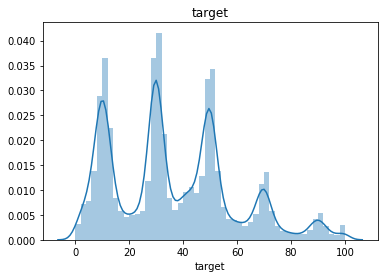

In [15]:
sns.distplot(df_train[cfg_col_Y]).set_title(cfg_col_Y);

### distribution of input variables

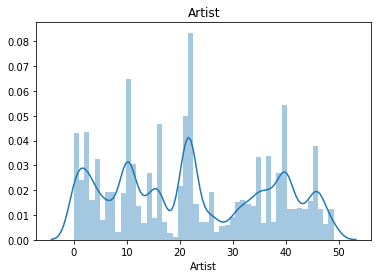

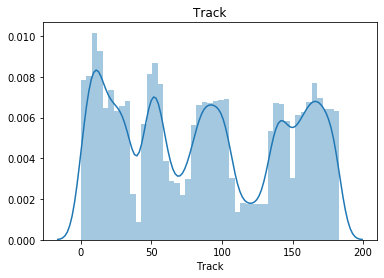

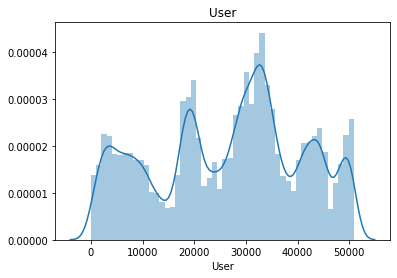

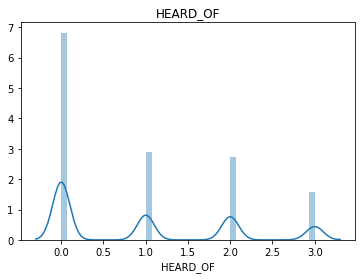

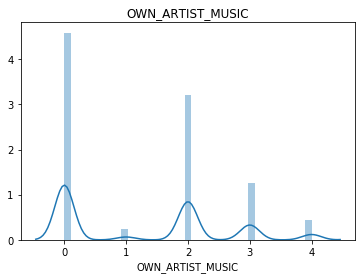

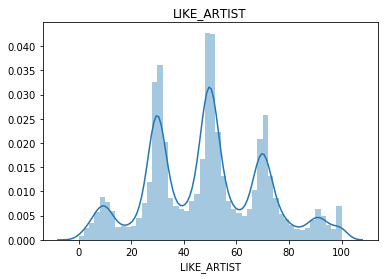

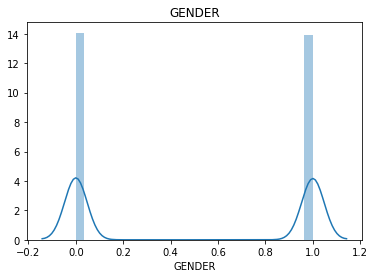

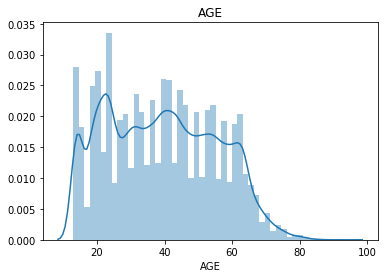

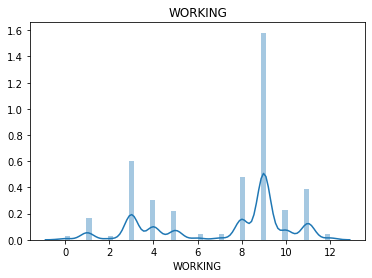

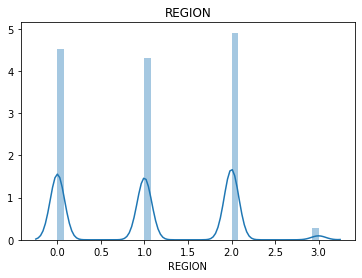

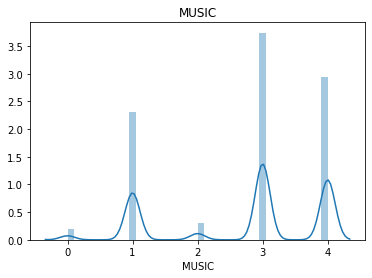

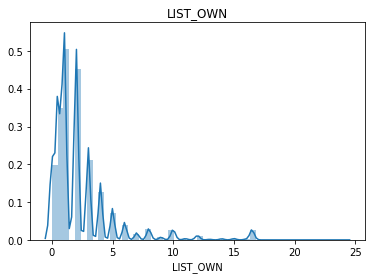

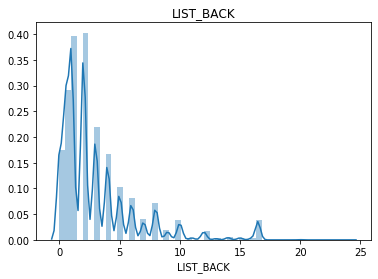

In [16]:
for icol in cfg_col_X:
    plt.figure();
    sns.distplot(df_train[icol]).set_title(icol);


### relation of inut variables to target variable

In [17]:
# for icol in cfg_col_X:
#     plt.figure();
#     sns.lmplot(x=icol, y=cfg_col_Y, data=df_train, ci=None);

## model training

In [18]:
df_trainX, df_trainY = df_train[cfg_col_X].fillna(0), df_train[cfg_col_Y]
df_trainX['user_mean']=df_train.groupby('User')['Rating'].transform('mean')
df_trainX['artist_mean']=df_train.groupby('Artist')['Rating'].transform('mean')

In [19]:
df_train['target_naive1']=df_train.groupby('User')['Rating'].transform('mean')

In [20]:
# mod_ols = sm.OLS(df_trainYc,sm.add_constant(df_trainXc))

# res_ols = mod_ols.fit()
# print(res_ols.summary())
# df_train.loc[idxSelNAN,'target_ols']=res_ols.predict()

In [21]:
mod_skols = LinearRegression()
mod_skols.fit(df_trainX,df_trainY)
df_train['target_skols']=mod_skols.predict(df_trainX)

In [22]:
mod_lgbm = lightgbm.LGBMRegressor(max_depth=2,learning_rate=0.1,n_estimators=100,reg_alpha=1.0)
mod_lgbm.fit(df_trainX,df_trainY)
df_train['target_lgbm']=mod_lgbm.predict(df_trainX)

## model evaluation

### prediction errors: in-sample

In [23]:
print('kaggle #1',13.24598**2,'kaggle #5',14.15668**2)
print('naive mean',mean_squared_error(df_train[cfg_col_Y],df_train['target_naive1']))
print('ols',mean_squared_error(df_train[cfg_col_Y],df_train['target_skols']))
print('gbm',mean_squared_error(df_train[cfg_col_Y],df_train['target_lgbm']))

kaggle #1 175.4559861604 kaggle #5 200.4115886224
naive mean 201.42522441074757
ols 185.6996734177598
gbm 178.4772391538346


### prediction errors: cross-validation

In [24]:
print('ols',-cross_validate(mod_skols, df_trainX, df_trainY, return_train_score=False, scoring=('r2', 'neg_mean_squared_error'), cv=10)['test_neg_mean_squared_error'].mean())
print('gbm',-cross_validate(mod_lgbm, df_trainX, df_trainY, return_train_score=False, scoring=('r2', 'neg_mean_squared_error'), cv=10)['test_neg_mean_squared_error'].mean())

ols 185.80375836309514
gbm 178.63486867584834


## model interpretation

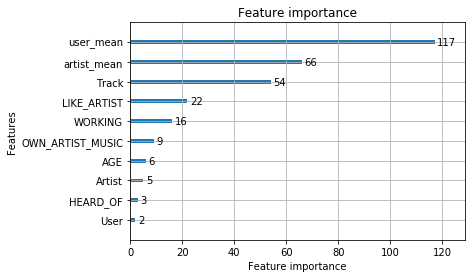

In [25]:
lightgbm.plot_importance(mod_lgbm)

In [26]:
df_trainX_shap = shap.sample(df_trainX, 1000)
explainer = shap.TreeExplainer(mod_lgbm, df_trainX_shap)
shap_values = explainer.shap_values(df_trainX_shap)

 95%|=================== | 952/1000 [00:17<00:00]       

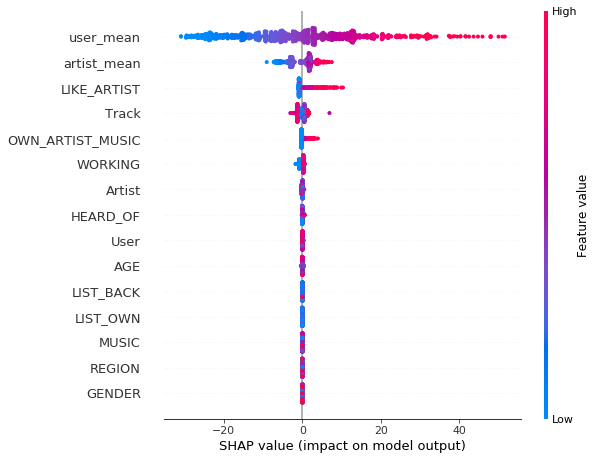

In [27]:
shap.summary_plot(shap_values, df_trainX_shap)


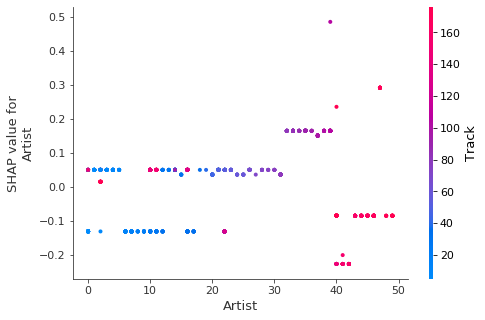

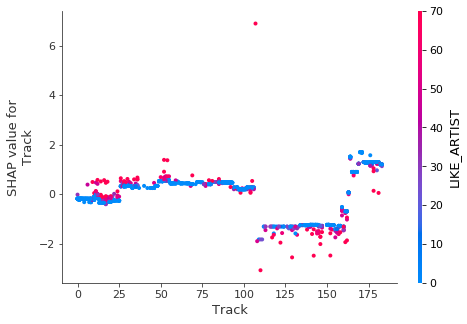

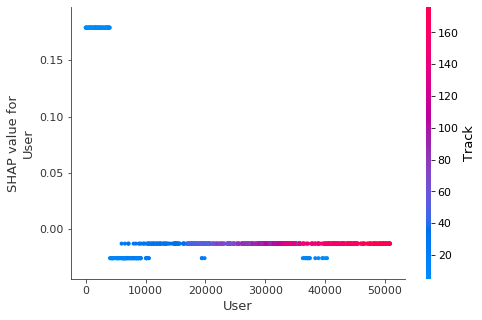

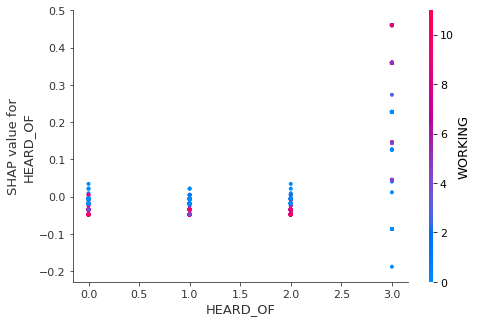

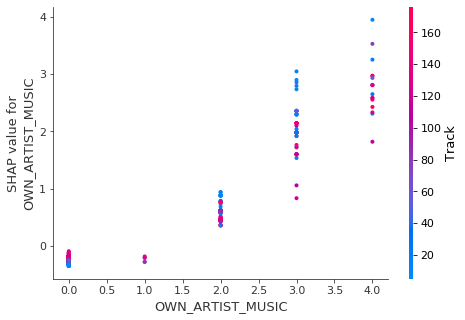

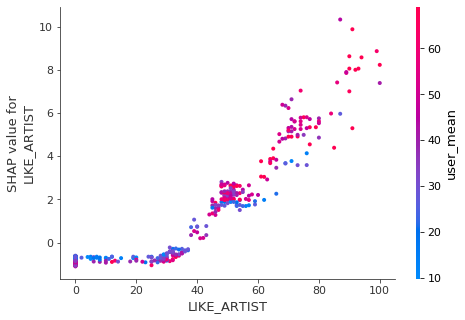

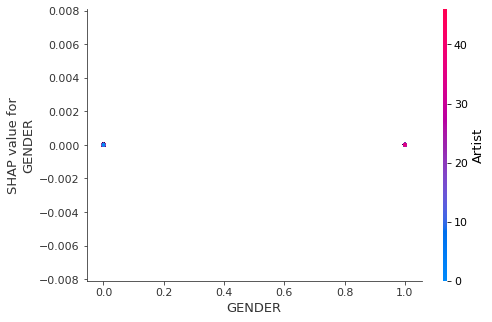

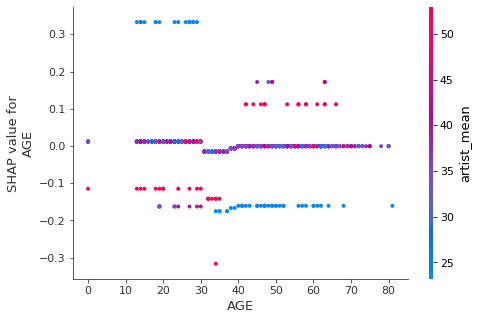

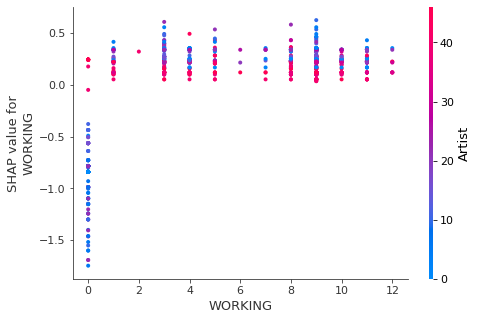

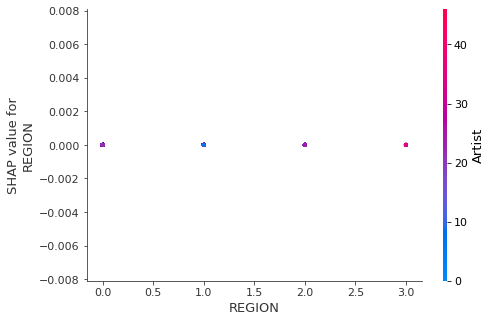

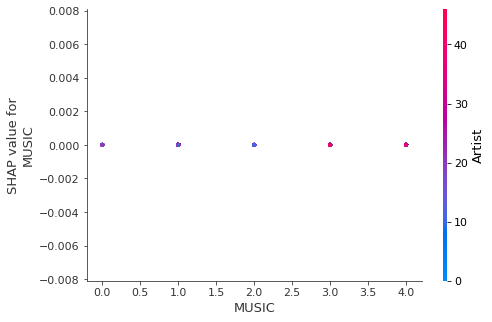

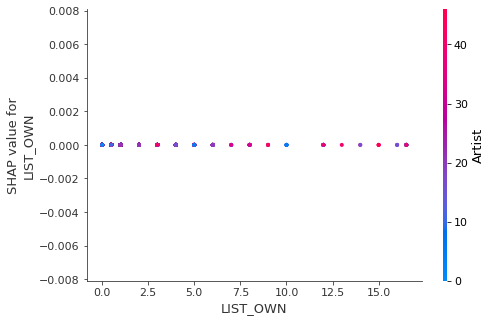

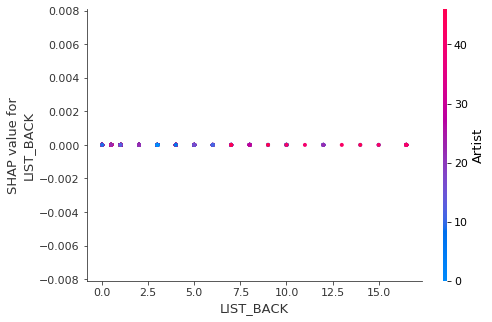

In [28]:
for col in cfg_col_X:
    shap.dependence_plot(col, shap_values, df_trainX_shap)#,interaction_index=None)